# Программирование на языке Python для сбора и анализа данных

*Текст лекции: Щуров И.В., НИУ ВШЭ*

Данный notebook является конспектом лекции по курсу «Программирование на языке Python для сбора и анализа данных» (НИУ ВШЭ, 2014-15). Он распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0](http://creativecommons.org/licenses/by-sa/4.0/). Фрагменты кода дополнительно распространяются на условиях [лицензии MIT](https://github.com/ischurov/pythonhse/blob/master/LICENSE). При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности, необходимо также указать активную гиперссылку на [страницу курса](http://math-info.hse.ru/s15/m). Там находятся другие материалы курса.

## Лекция 1. Первое знакомство

### Пример с красивой картинкой

Прежде, чем мы начнём изучать Python системно, мне хочется показать что-нибудь красивое и завлекательное, чтобы вы оценили возможности, прониклись и мотивировались. Просматривая ваши ответы на вопрос о трёх задачах, которые вы решите, когда освоите Python в достаточной степени, я обратил внимание, что многие из вас хотят обрабатывать информацию с различных сайтов. Наш первый пример будет как раз про это. Он скорее всего поначалу покажется чёрной магией, но со временем мы во всём разберёмся.

Для начала импортируем несколько библиотек. Скорее всего у вас уже установлена `pandas` (это библиотека для работы с датафреймами), но может не быть библиотеки `seaborn`. Её надо установить, например, набрав в командной строке `pip3 install seaborn` или `conda install seaborn`.

In [1]:
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

Теперь зайдём на [страницу Википедии](https://en.wikipedia.org/w/index.php?title=Moscow&oldid=683872744#Demographics) о Москве и найдём там табличку с информацией о динамике населения.
![Скриншот со страницы Википедии](http://math-info.hse.ru/f/2015-16/all-py/wikipedia-moscow-demography.png)

Мы хотим программно вытащить эту информацию со страницы и немножко её обработать. В ячейке ниже решеткой обозначается комментарий. (Всё, что написано после решетки и до конца строки, игнорируется Python.)

In [2]:
tables = pd.read_html("https://en.wikipedia.org/w/index.php?title=Moscow&oldid=683872744", header=1)
# используем постоянный адрес (oldid) для воспроизводимости
# параметр header нужен, поскольку заголовки столбцов находятся в строчке «Year, Pop., ±%», 
# являющейся второй строкой в таблице

table = tables[4]
# интересующая нас табличка имеет индекс 4 в списке
# я это обнаружил методом подбора :)

table

,Year,Pop.,±%
0,1897,1038625,—
1,1926,2019500,+94.4%
2,1939,4137000,+104.9%
3,1959,5032000,+21.6%
4,1970,6941961,+38.0%
5,1979,7830509,+12.8%
6,1989,8967332,+14.5%
7,2002,10382754,+15.8%
8,2010,11503501,+10.8%
9,2013,11794282,+2.5%


Ура! Наша таблица уже в Python! Чтобы начать её обрабатывать остаётся немного её подрихтовать. Cтолбец `Year` вообще-то должен содержать только числа (и восприниматься как числовой), но в последней строчке написал текст. Нужно его убрать.

In [3]:
table.drop(11, inplace=True)

И теперь превратить столбец `Year` в числовой.

In [4]:
table.Year=table.Year.astype(float)

Теперь можем рисовать картинки.

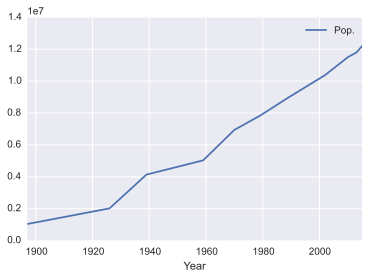

In [5]:
table.plot(x='Year', y='Pop.')

Какой функцией лучше всего описывается эта кривая? Попробуем для начала линейную:

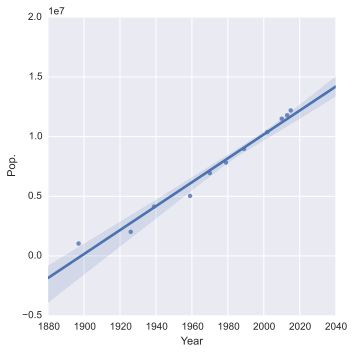

In [6]:
sns.lmplot(x='Year', y='Pop.', data=table)

Неплохо, но кажется, что всё-таки население Москвы растёт с некоторым ускорением. Попробуем квадратичную.

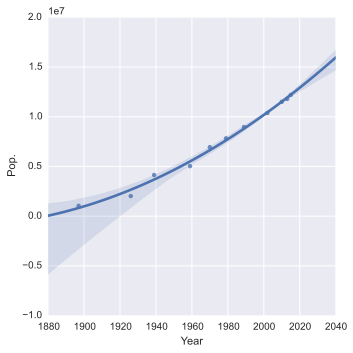

In [7]:
sns.lmplot(x='Year', y='Pop.', data=table, order=2)

Так-то лучше — видно, что график является выпуклым вниз, то есть происходит рост с ускорением! Итак, мы прошли полный цикл обработки информации: выкачали её с веб-странички, привели к нужному виду, визуализировали и сделали какие-то выводы. Это заняло буквально несколько строчек. Конечно, мы могли сделать ещё тысячу разных штук с нашей небольшой табличкой, но отложим это до того момента, когда нам будет понятно всё, что здесь произошло.

### Python как калькулятор

In [8]:
4*7

28

In [9]:
3*(2+5)

21

In [10]:
5^3 #угадайте, что получится

6

Вы думали, что крышечка (`^`) — это возведение в степень? Не тут-то было — это совсем другая операция, _побитное сложение по модулю два_. Она почти наверняка _никогда_ вам не понадобится. А степень обозначается двумя звёздочками (`**`)

In [11]:
5**3

125

Со сложением, умножением и степенью всё должно быть понятно. Деление, на первый взгляд, тоже не предвещает проблем:

In [12]:
12/3

4.0

Однако, здесь есть тонкость. Числа, которые мы делим, являются целыми. Результат, вообще говоря, может получиться целым, а может и нецелым. Для определенности, Python 3 всегда считает, что результат деления — это число _с плавающей точкой_ (`float`), то есть десятичная дробь. Именно на это указывает форма записи ответа: `4.0`, а не просто `4`. В программировании дробную от целой части отделяет не запятая (как принято в русскоязычной математической традиции), а точка (как принято в англоязычной традиции). Так `3` — это целое число 3, а `3.` или `3.0` — это число с плавающей точкой. В некоторых контекстах они ведут себя по-разному, хотя с математической точки зрения это одно и то же.

Так мы впервые столкнулись с различными _типами данных_.

**Внимание!** Поведение Python версии 2 было другим: он всегда делил нацело (отбрасывая остаток). Это приводило к огромному количеству проблем, когда разработчик ожидал, что деление будет «обычное», а получал целочисленное. В Python 3 деление происходит в числах с плавающей точкой; если вам нужно целочисленное, вы можете использовать двойной слеш (`//`).

In [13]:
3//2 #угадайте, что получится?

1

Как обстоят дела с другими операциями? Попробуем извлечь квадратный корень:

In [14]:
sqrt(4)

NameError: name 'sqrt' is not defined

Извлечение квадратного корня не входит в комплект математических операций, доступных в Python по умолчанию, поэтому вместо ответа мы получили какую-то непонятную ругань. Эта непонятная ругань называется исключением, когда-нибудь мы научимся их обрабатывать, а сейчас обратим внимание на последнюю строчку: `NameError: name 'sqrt' is not defined` — то есть «я не понимаю, что такое `sqrt`». Однако, не всё так плохо: соответствующая функция есть в стандартном модуле `math`. Чтобы ей воспользоваться, нужно импортировать этот модуль. Это можно сделать разными способами.

In [15]:
import math
math.sqrt(4)

2.0

После того, как модуль math импортирован, вы можете узнать, какие ещё в нём есть функции. В IPython Notebook для этого достаточно ввести имя модуля, поставить точку и нажать кнопку «Tab». Вот, например, синус:

In [16]:
math.sin(0)

0.0

Приведенный синтаксис может оказаться неудобным, если вам часто приходится вызывать какие-то математические функции. Чтобы не писать каждый раз слово «math», можно импортировать из модуля конкретные функции.

In [17]:
from math import sqrt

In [18]:
sqrt(4)

2.0

### Вещественные числа и погрешности
Вещественные числа в программировании не так просты. Вот, например, посчитаем синус числа $\pi$:

In [19]:
from math import pi, sin
sin(pi)
# думаете, получится 0? Ха-ха!

1.2246467991473532e-16

Непонятный ответ? Во-первых, это так называемая [компьютерная форма экспоненциальной записи](https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D1%8C#.D0.9A.D0.BE.D0.BC.D0.BF.D1.8C.D1.8E.D1.82.D0.B5.D1.80.D0.BD.D1.8B.D0.B9_.D1.81.D0.BF.D0.BE.D1.81.D0.BE.D0.B1_.D1.8D.D0.BA.D1.81.D0.BF.D0.BE.D0.BD.D0.B5.D0.BD.D1.86.D0.B8.D0.B0.D0.BB.D1.8C.D0.BD.D0.BE.D0.B9_.D0.B7.D0.B0.D0.BF.D0.B8.D1.81.D0.B8) чисел. Она удобна, если нужно уметь записывать очень большие или очень маленькие числа: `1.2E2` означает $1{,}2\cdot 10^2$, то есть 1200, а `2.4e-3` — то же самое, что $2{,}4\cdot 10^{-3}=0{,}0024$. Результат, посчитанный Python для $\sin\pi$, имеет порядок $10^{-16}$ — это очень маленькое число, близкое к нулю. Почему не «настоящий» ноль? Все вычисления в вещественных числах делаются компьютером с некоторой ограниченной точностью, поэтому зачастую вместо «честных» ответов получаются такие приближенные. К этому надо быть готовым.

### Переменные

Понятие «переменной» в программировании похоже на аналогичное понятие в математике. Переменная — это ячейка памяти, обозначаемая каким-то именем. В этой ячейке могут храниться числа, строки и более сложные объекты. Мы пока поработаем немножко с числовыми переменными.

In [20]:
x = 4
x

4

В отличие, например, от языков C или Паскаль, в Питоне не нужно как-то специально объявлять переменную — достаточно просто присвоить ей значение, и можно пользоваться!

In [21]:
x + 2

6

In [22]:
x = x + 2

С математической точки зрения, приведенная выше строчка кажется бессмыслицей — равенством, которое никогда не является верным. С точки зрения программирования, это команда, которая говорит «вычисли значение того, что стоит в правой части равенства, и присвой то, что получилось, переменной, стоящей в левой части равенства». Если вы знакомы с языком Pascal, вы бы написали «:=» вместо «=», но в Питоне используется синтаксис, более похожий на C — одиночное равенство означает операцию присвоения значения. 

In [23]:
x

6

Переменные могут хранить не только числа, но и другие данные. Например, строки. Мы столкнёмся с этим прямо в следующем разделе.

### Ввод данных
Работа в Jupyter / IPython Notebook редко требует писать код, который сам по себе запрашивает данные с клавиатуры, но для других приложений (и в частности для домашних работ) это может потребоваться. К тому же, написание интерактивных приложений само по себе забавное занятие. Напишем, например, программу, которая здоровается с нами по имени.

In [24]:
name = input("Введите ваше имя: ")
print("Привет,",name)

Введите ваше имя: Илья
Привет, Илья


Что здесь произшло? В первой строчке мы использовали функцию `input`. Она вывела на экран строчку, которую ей передали (обязательно в кавычках) и запросила ответ с клавиатуры. Я его ввёл, указав своё имя. После чего `input` вернула строчку `"Илья"` и эта строчка была присвоена переменной `name`. После этого во второй строке была вызвана функция `print` и ей были переданы две строчки — `"Привет,"` и то, что хранилось в переменной `name` (nо есть в данном случае `"Илья"`. Функция `print` вывела эти две строчки последовательно, разделив пробелом. Заметим, что в переменной `name` по-прежнему лежит та строчка, которую мы ввели с клавиатуры.

In [26]:
name

'Илья'

Попробуем теперь написать программу «удвоитель». Она должна будет принимать на вход число, удваивать его и возвращать результат.

In [27]:
x = input("Введите какое-нибудь число: ")
print(x*2)

Введите какое-нибудь число: 12
1212


Что-то здесь не то. Конечно, в некотором смысле компьютер сделал то, что мы его просили — было одно число 12, а стало два, но мы-то хотели чего-то другого. Почему так получилось? Дело в том, что `input` всегда возращает строку (он же не знает, что мы введём — цифлы или какие-то другие символы; он не понимает, что в запросе сказан «Введите какое-нибудь число» — для него это просто какая-то строка). И в переменной `x` сейчас не число `12`, а строка `'12'` (обратите внимание на апострофы).

In [28]:
x

'12'

Чтобы работать с ним как с числом, надо его превратить из строкового типа в числовой. Например, если мы хотим работать только с целыми числами, то подходящим будет тип `int` (от слова `integer`, целое число).

In [29]:
int(x)

12

Видите, апострофов нет — это уже число. Слово `int` это одновременно и обозначение типа данных (целые числа) и функция, которая превращает то, что ей передали в качестве аргумента, в указанный тип данных.

Перепишем программу-удвоитель следующим образом:

In [30]:
x_str = input("Введите какое-нибудь число: ")
x = int(x_str)
print(x*2)

Введите какое-нибудь число: 12
24


Совсем другое дело! Теперь в `x_str` лежит строчка, которую мы ввели, в `x` помещается результат её преобразования в целое число, и дальше это число удваивается и выводится на экран. Можно было бы не вводить дополнительную переменную (и сэкономить строчку):

In [31]:
x = int(input("Введите какое-нибудь число: "))
print(x*2)

Введите какое-нибудь число: 12
24


Попробуем ещё раз.

In [32]:
x = int(input("Введите какое-нибудь число: "))
print(x*2)

Введите какое-нибудь число: 12.34


ValueError: invalid literal for int() with base 10: '12.34'

Я попробовал ввести число `12.34` (нецелое) и Python не смог привести его в типу `int` (то есть сделать из строчки `"12.34"` целое число и выдал ошибку. Если бы мы хотели работать с нецелыми числами, нам нужно было использовать тип `float` (от слова _float_, плавать — обозначает _плавающую точку_ — почему она плавающая, это отдельная история, как-нибудь обсудим).

In [33]:
x = float(input("Введите какое-нибудь число (не обязательно целое): "))
print(x*2)

Введите какое-нибудь число (не обязательно целое): 12.34
24.68


Всё работает!

### Практичекое задание: числа Фибоначчи

*Числа Фибоначчи* или *последовательность Фибоначчи* — последовательность чисел, начинающаяся с двух единиц, и такая, что очередное число в этой последовательности равно сумме двух предыдущих. Формально можно определить её следующим образом:

$a_1=1$;

$a_2=1$;

$a_{n+1}=a_n+a_{n-1}$ для всех $n>2$.

Например, $a_3=1+1=2$, $a_4=2+1=3$.

**Задача:** посчитать 15-е число Фибоначчи

In [34]:
a=1 # первое число
b=1 # второе число
i=2 # номер того числа, которое находится в переменной b (сейчас это a_2)

Мы будем хранить два последних числа, поскольку именно они определяют следующее, а также номер последнего найденного числа (переменная i).

In [35]:
c=a+b # нашли следующее число
i=i+1 # увеличили i на 1
a=b   # значение a нам уже не нужно, а вот значение b ещё пригодится
b=c   # запомнили вычисленное значение
print(i, b)

3 2


Питон выполняет команды последовательно, строчку за строчкой, поэтому порядок следоавния команд очень важен. Выполняя эту ячейку несколько раз, вы будете получать каждый раз очередное число Фибоначчи.

**Контрольный вопрос.** Что произойдёт, если мы поменяем местами две строчки до `print`?

In [36]:
# Повторим этот код ещё раз

c=a+b # нашли следующее число
i=i+1 # увеличили i на 1
a=b   # значение a нам уже не нужно, а вот значение b ещё пригодится
b=c   # запомнили вычисленное значение
print(i, b)

4 3


In [37]:
# И ещё раз

c=a+b # нашли следующее число
i=i+1 # увеличили i на 1
a=b   # значение a нам уже не нужно, а вот значение b ещё пригодится
b=c   # запомнили вычисленное значение
print(i, b)

5 5


In [38]:
# И ещё раз

c=a+b # нашли следующее число
i=i+1 # увеличили i на 1
a=b   # значение a нам уже не нужно, а вот значение b ещё пригодится
b=c   # запомнили вычисленное значение
print(i, b)

6 8


**Совет.** Можно было не копироать эту ячейку с кодом много раз, а просто запускать одну и ту же ячейку неколько раз. Проще всего это сделать с помощью комбинации _Ctrl+Enter_. И, конечно, на практике мы не будем вручную выполнять один код много раз — для этого есть *циклы*. Но с ними мы познакомимся на следующей лекции.

### Лирическое отступление: как понять, какие строчки писать
Зачастую не удаётся быстро сообразить, какие строчки нужно записать в программе для получения нужного результата. При этом почти наверняка мы на самом деле знаем, какие действия и в каком порядке нужно совершить — например, если бы нам кто-то дал ручку и бумагу и попросил посчитать 15-е число Фибоначчи, думаю, все бы справились — даже если написание соответствующей программы вызывает трудности. То есть вы навяернка *знаете* нужный алгоритм, и нужно лишь проанализировать собственные действия. В общем, совсем по Платону.

Разумным может быть такой механизм действий. Возьмите лист бумаги, карандаш и ластик. Разделите лист на две части. В левой нарисуйте несколько прямоугольников — это будут переменные. Внесите в них те данные, которые у вас есть. Теперь используйте левую часть листа как черновик, чтобы получить нужный результат, придерживаясь при этом следующих правил:

1. Ничего не запоминайте в уме. Компьютер не может ничего запомнить, его нужно специально инструктировать, чтобы он записал полученный результат в какую-то переменную.
2. Не записывайте ничего вне обозначенных прямоугольников-переменных. Если у вас нет свободных прямоугольников, подумайте: либо нужно завести ещё одну переменную (опишите, что будет находиться в этой переменной), либо использовать одну из старых (если данные, записанные в неё, вам уже не потребуются). Старайтесь не заводить новых переменных без лишней необходимости.
3. Записывайте на правой части листа все действия, которые вы совершаете.

То, что получится на правой стороне, и есть ваш алгоритм. Остаётся только перевести его на компьютерный язык (в данном случае Python) — и готово!